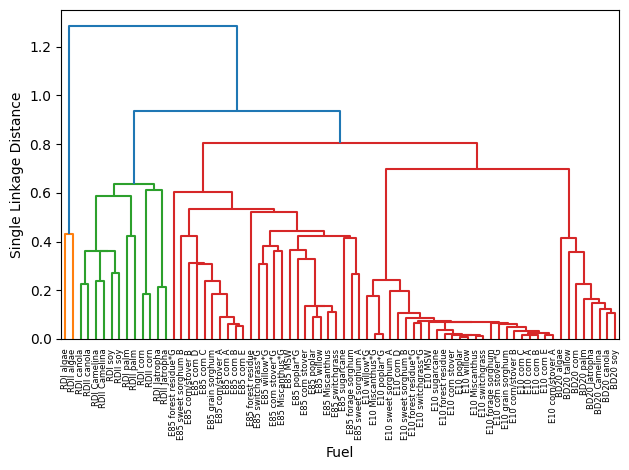

Cluster Labels: 
[4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 0 0 0 0 0 0 3 0 0 0 0 0 0]
Cluster Centers:
 [[0.92307692 0.46327684 0.64417309 0.37342942 0.11673414 0.20395395
  0.05776737 0.04746835 0.14207317 0.29469697 0.15623429 0.44444444]
 [0.         0.17864407 0.15578406 0.14766741 0.39821862 0.52684685
  0.14903981 0.25518987 0.33882927 0.53715152 0.61375566 0.18157895]
 [0.32307692 0.48372881 0.01312768 0.0194235  0.92502024 0.11159159
  0.04505855 0.02936709 0.18682927 0.25569697 0.4786727  0.42842105]
 [0.92307692 0.94491525 0.01799486 0.02716186 0.31578947 0.77027027
  0.91978923 0.91772152 0.9097561  0.91060606 0.82051282 0.94298246]
 [1.         0.61016949 0.1214653  0.07677384 0.93674089 0.22034535
  0.06045082 0.09018987 0.23963415 0.41458333 0.50075415 0.59649123]]

Cluster Members:
Cluster 0: ['RDI Camelina', 'RDI canola', 'RDI corn', 'RDI\xa0Jatropha', 'RDI\xa0palm', 'RDI\xa0soy', 'RDII\xa0Cam

KMeans(init='random', n_clusters=5, random_state=0)

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

def plot_dendrogram(df, linkage_method='single', ylabel='single Linkage distance'):


    clustering = AgglomerativeClustering(n_clusters=None, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage=linkage_method, 
                                         distance_threshold=0.68, compute_distances=True).fit(df[c_norm])

    cluster_labels = clustering.labels_ # get cluster labels, to know to what cluster a certain datapoint belongs to

    seeds = np.array([df[c_norm].iloc[cluster_labels == i].mean(axis=0) for i in range(5)]) # the seeds are the centers of the cluster (for k-mean seeding)
                                                                                            # I'm sorry! I needed ChatGPT for this line :'(
    #print(seeds)

    # clustering
    # AgglomerativeClustering()
    # clustering.n_clusters_
    # clustering.labels_
    # clustering.n_connected_components_
    # clustering.n_features_in_
    # clustering.children_
    # clustering.distances_
    # num_clusters = clustering.n_clusters_ # get the number of clusters at a certain distance threshold

    z=hierarchy.linkage(df[c_norm], linkage_method)

    hierarchy.dendrogram(z, labels = df.iloc[:, 0]. tolist())  # names of fuels as lables

    plt.xlabel('Fuel')
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    return seeds

def k_means_clust(df, center, number_starts):

    kmeans = KMeans(n_clusters=5, init=center, n_init=number_starts, random_state=0).fit(df[c_norm])

    print(f"Cluster Labels: \n{kmeans.labels_}")
    print("Cluster Centers:\n", kmeans.cluster_centers_)

    # Report the cluster members:
    cluster_members = {}
    for cluster_num in range(kmeans.n_clusters):
        members = df.iloc[:, 0][kmeans.labels_ == cluster_num].tolist()
        cluster_members[cluster_num] = members

    print("\nCluster Members:")
    for cluster, members in cluster_members.items():
        print(f"Cluster {cluster}: {members}")

    return kmeans


df = pd.read_excel('Exercise3_data.xlsx')
df = df.dropna(subset = ['Unnamed: 0']) # all rows with NaN in the column 'Unnamed: 0' are droped.
# normalize every column (values between 0 and 1)
c_norm = df.columns[1:]   # exclude the first column, as it is not numerical
df[c_norm] = (df[c_norm] - df[c_norm].min()) / (df[c_norm].max() - df[c_norm].min())
#df


seeds = plot_dendrogram(df, linkage_method='single', ylabel='Single Linkage Distance') # use seeds only from single linkage
#plot_dendrogram(df, linkage_method='average', ylabel='Average Linkage Distance')
#plot_dendrogram(df, linkage_method='ward', ylabel='Ward Linkage Distance')

k_means_clust(df, seeds, 1)
k_means_clust(df, 'random', 'auto')  



#print(df[c_norm])

## jusitification for number of clusters:
# all linkage methodes lead tp similar clusters, with reasonable 4 to 6 clusters.
# for all three linkage methods, the same three clusters can be choosen with certain distances: RDI(I) algea, RDI(I) rest and E85

# I will concentrate on single linkage: The most obvious choice, I think, is
# - 5 clusters: at a distance at ~0.68. Here, for all clusters, the distance to the next higher cluster is quite large.
# Also, only by looking at the names of the fuels, it is clear, that the fuels inside each cluster have something in common:
    # except for the orange cluster with RDI(I) algea, the primary incrediences (Diesel, Gasoline, Rewnewable Diesel and FAME / bioethanol content is the most important feature for clustering.
    # Therefore, I name the clusters
        # RDI(I) algea; RDI(I) rest; E85; E10; BD20

In [8]:
df

,Unnamed: 0,Distance,Cost,LO,Water,GWP,FWET,FWEU,HT,PMPF,POFP,TA,TE
3,BD20 algae,1.0,0.661017,0.003428,0.02439,0.97166,0.324324,0.223653,0.253165,0.387805,0.534848,0.628959,0.649123
4,BD20 Camelina,1.0,0.559322,0.195373,0.117517,0.927126,0.201201,0.032787,0.063291,0.209756,0.386364,0.473605,0.54386
5,BD20 canola,1.0,0.610169,0.101971,0.064302,0.927126,0.201201,0.038642,0.063291,0.197561,0.356061,0.455505,0.596491
6,BD20 corn,1.0,0.525424,0.312768,0.137472,0.959514,0.231231,0.045667,0.075949,0.285366,0.522727,0.556561,0.508772
7,BD20 Jatropha,1.0,0.525424,0.093402,0.055432,0.94332,0.231231,0.038642,0.075949,0.236585,0.431818,0.505279,0.508772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,RDII canola,0.923077,0.771186,0.520137,0.32816,0.032389,0.162162,0.067916,0.037975,0.043902,0.087879,0.033183,0.763158
71,RDII corn,0.923077,0.29661,0.841474,0.055432,0.165992,0.339339,0.096019,0.113924,0.421951,0.822727,0.461538,0.27193
72,RDII Jatropha,0.923077,0.288136,0.474722,0.280488,0.11336,0.327327,0.069087,0.088608,0.243902,0.477273,0.285068,0.263158
73,RDII palm,0.923077,0.491525,0.239075,1.0,0.0,0.144144,0.038642,0.012658,0.080488,0.190909,0.095023,0.473684
